<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


$ \ $ 

# ***Launch Sites Locations Analysis with Folium.***

The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully (ojalá) we could discover some of the factors by analyzing the existing launch site locations.

$ \ $

----

## ***Objectives.***

This lab contains the following tasks:

* $\color{aquamarine}{\text{TASK 1:}}$ Mark all launch sites on a map

* $\color{aquamarine}{\text{TASK 2:}}$ Mark the (success/failed) launches for each site on the map

* $\color{aquamarine}{\text{TASK 3:}}$ Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.

$ \ $ 

-----

## ***Packages.***

Let's first import required Python packages for this lab:

In [1]:
!pip3 install folium
!pip3 install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import folium
import wget
import pandas as pd

In [3]:
#(1) Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster

#(2) Import folium MousePosition plugin
from folium.plugins import MousePosition

#(3) Import folium DivIcon plugin
from folium.features import DivIcon

$ \ $

-----

## ***Task 1: Mark all launch sites on a map.***

$(1)$ The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.

In [4]:
#(1) Download  the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')

#(2) Read the `spacex_launch_geo.csv`
spacex_df = pd.read_csv(spacex_csv_file)


$ \ $

$(2)$ Now, we will take a look at what are the coordinates for each site.

In [5]:
spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [6]:
# Select relevant columns: "Launch Site", "Lat", "Long", "class"
spacex_df = spacex_df[["Launch Site", "Lat", "Long", "class"]]
spacex_df.head()

,Launch Site,Lat,Long,class
0,CCAFS LC-40,28.562302,-80.577356,0
1,CCAFS LC-40,28.562302,-80.577356,0
2,CCAFS LC-40,28.562302,-80.577356,0
3,CCAFS LC-40,28.562302,-80.577356,0
4,CCAFS LC-40,28.562302,-80.577356,0


In [7]:
# aqui agrupamos nuestros datos teniendo en cuenta la columna "Launch Site"
launch_sites_df = spacex_df.groupby(["Launch Site"], as_index = False).first()
launch_sites_df

,Launch Site,Lat,Long,class
0,CCAFS LC-40,28.562302,-80.577356,0
1,CCAFS SLC-40,28.563197,-80.576820,1
2,KSC LC-39A,28.573255,-80.646895,1
3,VAFB SLC-4E,34.632834,-120.610745,0


In [8]:
# tomamos solo las columnas 
launch_sites_df = launch_sites_df[["Launch Site", "Lat", "Long"]]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights (perspectivas) about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.

$ \ $


$(3)$ We create a `folium Map object` with an initial center location to be NASA Johnson Space Center at Houston, Texas.

In [9]:
# the location of NASA Johnson Space Center is this
nasa_coordinate = [29.559684888503615, -95.0830971930759]

# usamos la funcion folium teniendo en cuenta las coordenadas de la nasa
site_map = folium.Map(location = nasa_coordinate, zoom_start = 10)

$ \ $


$(4)$ We will use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate.

In [24]:
#(1) Create a blue circle at NASA Johnson Space Center's coordinate with a popup (surgir) label showing its name
folium.Circle(nasa_coordinate, radius = 1000, color = '#d35400', fill = True).add_child(folium.Popup('NASA Johnson Space Center')).add_to(site_map)


#(2) Create a orange circle at NASA Johnson Space Center's coordinate with a icon showing its name
folium.map.Marker(nasa_coordinate,                          
                  icon = DivIcon(               # Create an icon as a text label
                  icon_size = (20,20),
                  icon_anchor = (0,0),
                  html = '<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC')
                  ).add_to(site_map)


site_map


and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.

$ \ $

$(5)$ Let's add a circle for each launch site in data frame launch_sites.

In [11]:
diccionario = (launch_sites_df.transpose()).to_dict()
diccionario 

{0: {'Launch Site': 'CCAFS LC-40', 'Lat': 28.56230197, 'Long': -80.57735648},
 1: {'Launch Site': 'CCAFS SLC-40', 'Lat': 28.56319718, 'Long': -80.57682003},
 2: {'Launch Site': 'KSC LC-39A', 'Lat': 28.57325457, 'Long': -80.64689529},
 3: {'Launch Site': 'VAFB SLC-4E', 'Lat': 34.63283416, 'Long': -120.6107455}}

In [12]:
# Initialize the map
site_maps = folium.Map(location = nasa_coordinate, zoom_start=4)


# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for x in diccionario:
  coordenada = [diccionario[x]["Lat"], diccionario[x]["Long"]]
  folium.Circle(coordenada, radius = 1000, color='#000000', fill=True).add_child(folium.Popup(diccionario[x]["Launch Site"])).add_to(site_maps)
  folium.map.Marker(coordenada, icon=DivIcon(icon_size=(20,20), icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % diccionario[x]['Launch Site'] )).add_to(site_maps)

site_maps


Now, you can explore the map by zoom-in/out the marked areas , and try to answer the following questions:

* Are all launch sites in proximity to the Equator line?

* Are all launch sites in very close proximity to the coast?

* Also please try to explain your findings.

$ \ $ 

----

## ***Task 2: Mark the success/failed launches for each site on the map.***

$(1)$ Let's try to enhance (mejorar) the map by adding the launch outcomes for each site, and see which sites have high success rates. 

$ \ $

***Note:*** Recall that data frame `spacex_df` has detailed launch records, and the class column indicates if this launch was successful or not.

In [13]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


$ \ $

$(2)$ Next, let's create markers for all launch records. 

* If a launch was successful ($\color{yellow}{\text{spacex_df["class"]}=1}$), then we use a green marker.

* If a launch was failed ($\color{yellow}{\text{spacex_df["class"]}=0}$), then we use a red marker.


 Create a new column in `spacex_df` called $\color{green}{\text{marker_color}}$ to store the marker colors based on the class value.

In [14]:
def color(x):
    if x == 1:
        return "green"
    elif x==0:
        return "red"
    
spacex_df["marker_color"] = spacex_df["class"].apply(color)

spacex_df.head()

,Launch Site,Lat,Long,class,marker_color
0,CCAFS LC-40,28.562302,-80.577356,0,red
1,CCAFS LC-40,28.562302,-80.577356,0,red
2,CCAFS LC-40,28.562302,-80.577356,0,red
3,CCAFS LC-40,28.562302,-80.577356,0,red
4,CCAFS LC-40,28.562302,-80.577356,0,red


$ \ $ 

$(3)$ For each launch result in `spacex_df` data frame, add a $\color{green}{\text{folium.Marker}}$ to  $\color{green}{\text{marker_cluster}}$

In [15]:
spacex_df.head()

,Launch Site,Lat,Long,class,marker_color
0,CCAFS LC-40,28.562302,-80.577356,0,red
1,CCAFS LC-40,28.562302,-80.577356,0,red
2,CCAFS LC-40,28.562302,-80.577356,0,red
3,CCAFS LC-40,28.562302,-80.577356,0,red
4,CCAFS LC-40,28.562302,-80.577356,0,red


In [16]:
#help(spacex_df.groupby)

In [17]:
agrupacion = spacex_df.groupby("Launch Site", as_index=False).mean()[["Launch Site","Lat", "Long"]]
agrupacion

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [18]:
#(1) creamos un objeto de tipo MarkerCluster
marker_cluster = MarkerCluster()

#(2) adjuntamos marker_cluster a site_maps
site_maps.add_child(marker_cluster)

#(3) iteramos sobre nuestros resultados
diccionario = (spacex_df.transpose()).to_dict()
for x in diccionario:
    location = [diccionario[x]["Lat"], diccionario[x]["Long"]]
    icon = folium.Icon(color='white', icon_color = diccionario[x]['marker_color'])   
    marker = folium.Marker(location = location, icon = icon).add_to(site_maps)
    marker_cluster.add_child(marker)

#(4) mostramos en pantalla nuestra imagen
site_maps

$ \ $

----

## ***TASK 3: Calculate the distances between a launch site to its proximities.***

$(1)$ Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway).


In [19]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
                              position='topright',
                              separator=' Long: ',
                              empty_string='NaN',
                              lng_first=False,
                              num_digits=20,
                              prefix='Lat:',
                              lat_formatter=formatter,
                              lng_formatter=formatter,
                              )

site_maps.add_child(mouse_position)
site_maps

$ \ $

$(2)$ You can calculate the distance between two points on the map based on their Lat and Long values using the following method.

In [20]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6371

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

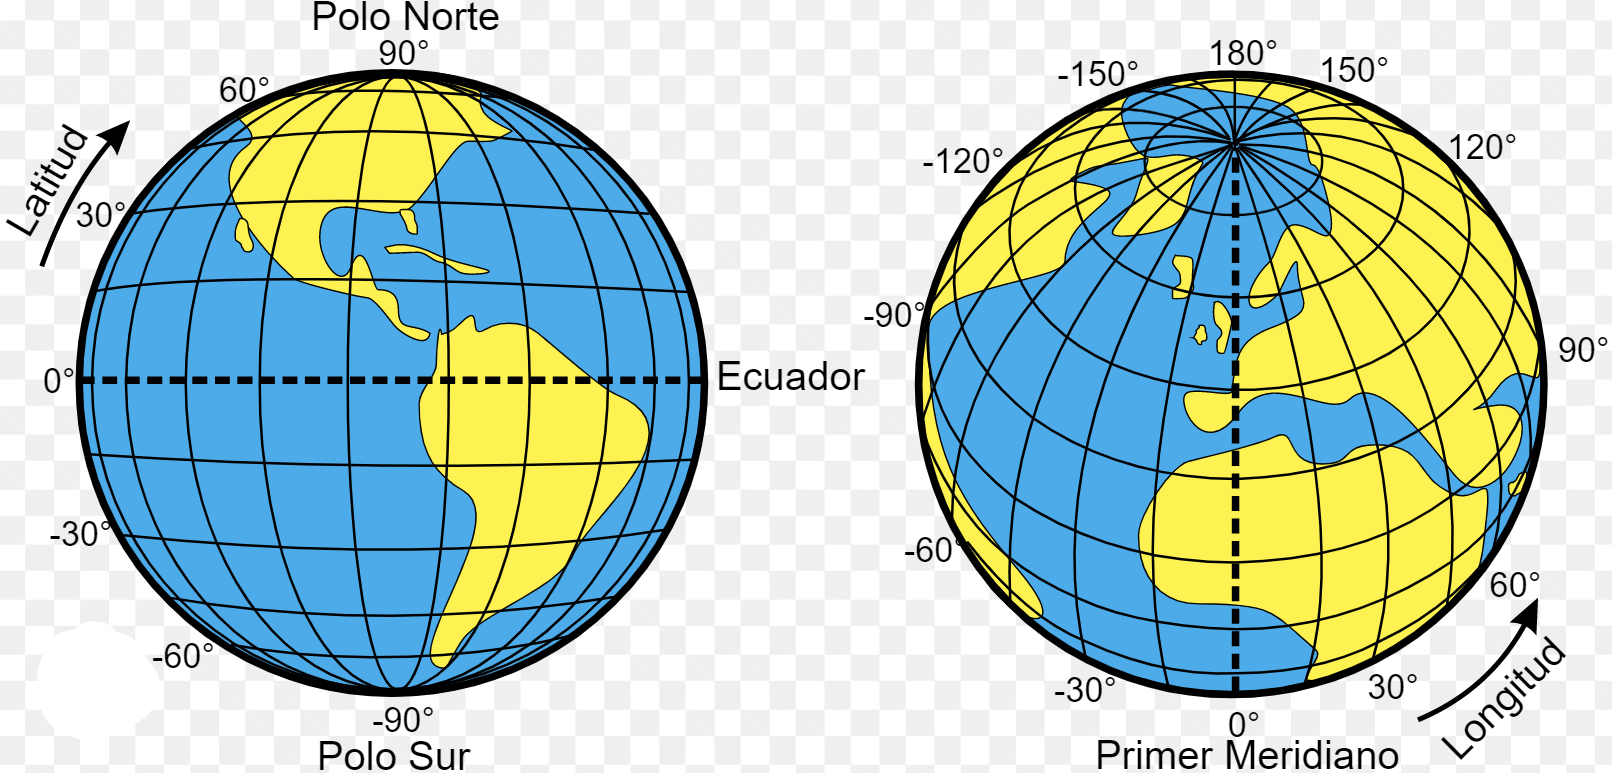


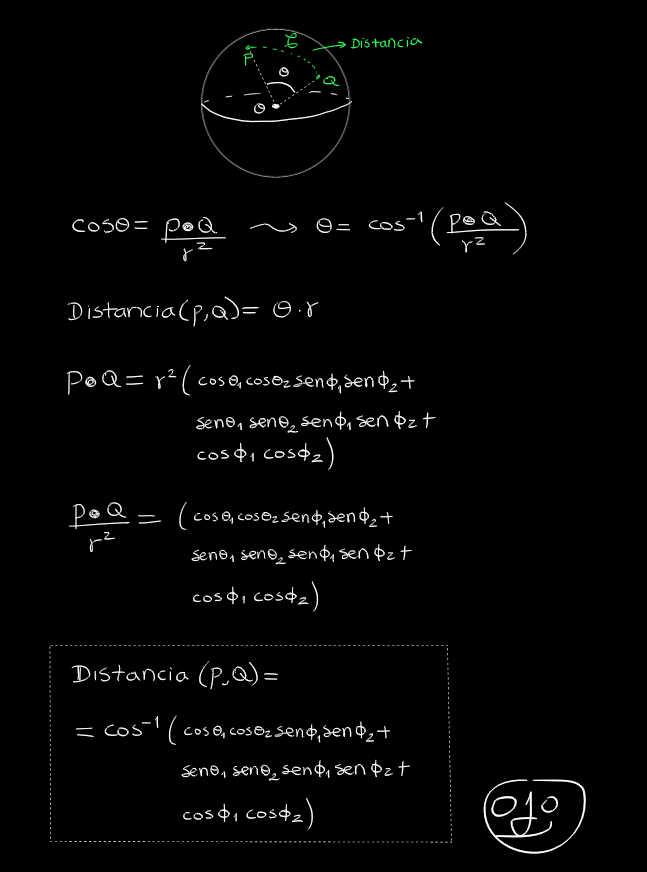





$ \ $

$(3)$ Describe the distance Medellin and the launch site.

In [21]:
diccionario = (spacex_df.transpose()).to_dict()
lista = []

for x in diccionario:
  (a,b) = (diccionario[x]["Lat"], diccionario[x]["Long"])
  (c,d)=(6.2997,-75.5695)
  distancia = calculate_distance(a,b,c,d)
  lugar = diccionario[x]["Launch Site"]
  lista.append(f"La distancia entre Medellín y {lugar} es {distancia} kilometros")

resultados = list(set(lista))
resultados

['La distancia entre Medellín y VAFB SLC-4E es 5580.853929746135 kilometros',
 'La distancia entre Medellín y KSC LC-39A es 2533.659163758729 kilometros',
 'La distancia entre Medellín y CCAFS LC-40 es 2530.9399961858153 kilometros',
 'La distancia entre Medellín y CCAFS SLC-40 es 2531.02525547859 kilometros']

$ \ $

$(4)$ After obtained its coordinate, create a `folium.Marker` to show the distance.

In [22]:
distance_marker = folium.Marker([6.2997,-75.5695],  # coordenadas de medellin
                                icon = DivIcon(
                                              icon_size = (20,20),
                                              icon_anchor = (0,0),
                                              html = '<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(2531.02525547859)   #Distancia de medellin al lugar de lanzamiento mas cercano de lanzamiento = 2531.02525547859
                                              )
                                )

site_maps.add_child(distance_marker)

$ \ $

$(5)$ Draw a PolyLine between a launch site to Medellin.

In [23]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)
coordinates = [[28.563197, -80.576820],[6.2997, -75.5695]]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_maps.add_child(lines)